In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics

from node2vec import Node2Vec

sns.set_style('whitegrid')

# 1. Calculations on the artificial data
every node has and edge with the node within their own group only.

In [2]:
pure_edges = pd.read_csv('../data/clear_cluster_test/pure_edges.csv', header=None, names=('from','to'))
labels = pd.read_csv('../data/clear_cluster_test/labels.csv', header=None, 
                     names=('node','label','label+'))
labels_list = list(labels['label'].unique())

n_clusters = len(labels['label'].unique())

In [3]:
G_pure = nx.Graph()
G_pure.add_nodes_from(labels['node'])

In [4]:
G_pure.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24))

In [5]:
for i, row in pure_edges.iterrows():
    G_pure.add_edge(row['from'],row['to'], weight=1)

In [6]:
G_pure.size()

50

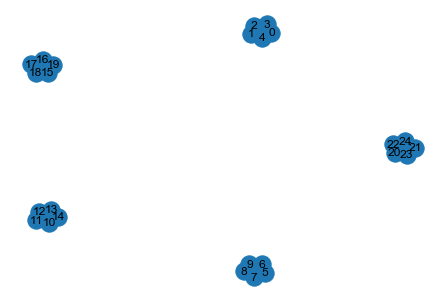

In [7]:
pos = nx.spring_layout(G_pure)
nx.draw(G_pure, pos=pos, with_labels=True)

In [8]:
dimensions = 128
walk_length = 80
num_walks = 10
p = 1.0
q = 1.0
workers = 4

window = 10
min_count = 1
seed = 0

In [9]:
pure_n2v = Node2Vec(G_pure, 
               dimensions = dimensions, 
               walk_length = walk_length,
               num_walks = num_walks,
               p = p,
               q = q,
               workers = workers
              )

Computing transition probabilities: 100%|██████████| 25/25 [00:00<00:00, 3125.97it/s]


In [10]:
pure_n2v.walks

[['19',
  '16',
  '15',
  '17',
  '15',
  '16',
  '18',
  '19',
  '15',
  '18',
  '17',
  '18',
  '15',
  '17',
  '18',
  '17',
  '19',
  '15',
  '17',
  '16',
  '17',
  '18',
  '19',
  '18',
  '16',
  '15',
  '17',
  '15',
  '18',
  '17',
  '15',
  '17',
  '16',
  '18',
  '19',
  '17',
  '19',
  '16',
  '15',
  '18',
  '17',
  '18',
  '19',
  '16',
  '19',
  '16',
  '15',
  '18',
  '17',
  '16',
  '15',
  '19',
  '16',
  '17',
  '19',
  '16',
  '18',
  '17',
  '15',
  '16',
  '17',
  '18',
  '15',
  '17',
  '16',
  '17',
  '18',
  '15',
  '19',
  '16',
  '18',
  '17',
  '16',
  '17',
  '16',
  '15',
  '16',
  '17',
  '19',
  '17'],
 ['2',
  '4',
  '3',
  '4',
  '0',
  '1',
  '4',
  '0',
  '4',
  '3',
  '0',
  '2',
  '3',
  '1',
  '0',
  '2',
  '0',
  '1',
  '3',
  '0',
  '3',
  '1',
  '4',
  '1',
  '0',
  '3',
  '1',
  '3',
  '1',
  '0',
  '2',
  '1',
  '0',
  '1',
  '2',
  '1',
  '3',
  '2',
  '0',
  '2',
  '3',
  '4',
  '0',
  '4',
  '0',
  '4',
  '1',
  '2',
  '3',
  '4',
  '1',
  

In [11]:
pure_model = pure_n2v.fit(window = window, 
                          min_count = min_count,
                          seed = seed
                         )

In [12]:
pure_model_nodes = list(pure_model.wv.vocab)
print(pure_model_nodes)

['19', '16', '15', '17', '18', '2', '4', '3', '0', '1', '20', '23', '21', '22', '24', '9', '8', '6', '7', '5', '12', '13', '10', '11', '14']


In [13]:
pure_X = pure_model.wv.vectors
pure_X

array([[ 0.23252523,  0.06476028,  0.06904686, ...,  0.45880887,
         0.26191926,  0.25243235],
       [-0.41616437, -0.17375384, -0.43957862, ...,  0.4179227 ,
         1.0936644 ,  0.18611799],
       [ 0.5686456 , -0.11022805, -0.664971  , ..., -0.16121173,
         0.09372946,  0.1823703 ],
       ...,
       [-0.03488475, -0.3635749 , -0.17721711, ..., -0.3351596 ,
         0.8180434 ,  0.0541399 ],
       [ 0.556617  , -0.1038206 , -0.631674  , ..., -0.15365419,
         0.06430113,  0.17647307],
       [ 0.23205915,  0.07435584,  0.10216138, ...,  0.46811074,
         0.23561862,  0.25214258]], dtype=float32)

In [14]:
pure_sorted_labels = []

for i in pure_model_nodes:
    pure_sorted_labels.append(labels.loc[int(i)]['label'])
    
pure_sorted_labels

[3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

In [15]:
kmeans = KMeans(n_clusters=n_clusters, random_state=seed).fit(pure_X)
pure_clusters = kmeans.labels_

In [41]:
pure_clusters

array([3, 2, 4, 4, 0, 2, 3, 1, 1, 1, 4, 0, 0, 3, 1, 0, 2, 3, 4, 2, 0, 2,
       1, 4, 3])

In [45]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=5
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25,
                             avoid_empty_clusters=True)
assigned_clusters = kclusterer.cluster(pure_X, assign_clusters=True)
print (assigned_clusters)

[4, 2, 1, 1, 3, 2, 4, 0, 0, 0, 1, 3, 3, 4, 0, 3, 2, 4, 1, 2, 3, 2, 0, 1, 4]


In [46]:
pure_f1_cos = metrics.f1_score(pure_sorted_labels,assigned_clusters, average='micro')
# pure_f1_2d_cos = metrics.f1_score(pure_sorted_labels,pure_clusters_2d, average='micro')

print(pure_f1_cos)

0.28


In [17]:
pure_tsne = TSNE(n_components=2, random_state=seed, perplexity=5)
pure_X_2d = pure_tsne.fit_transform(pure_X)
pure_X_2d

array([[ 237.89734  ,  -65.49969  ],
       [-214.25432  , -211.8358   ],
       [  81.364044 ,  196.99025  ],
       [  99.96611  ,  183.09157  ],
       [-156.56938  ,  142.91443  ],
       [-193.09665  , -234.47304  ],
       [ 226.2698   ,  -36.48773  ],
       [   1.2823446,  -77.874725 ],
       [  26.46332  ,  -94.05738  ],
       [  15.7126665, -114.43563  ],
       [  58.37312  ,  196.60689  ],
       [-149.09993  ,  112.52753  ],
       [-174.31201  ,  128.14551  ],
       [ 254.7616   ,  -49.695698 ],
       [  24.697378 ,  -70.77065  ],
       [-135.4059   ,  131.08394  ],
       [-198.2787   , -194.72295  ],
       [ 247.3523   ,  -26.945652 ],
       [  82.74624  ,  166.47614  ],
       [-183.35333  , -213.38141  ],
       [-170.96324  ,  104.32422  ],
       [-216.97673  , -234.7261   ],
       [  -3.7012222, -100.382996 ],
       [  60.46931  ,  172.71878  ],
       [ 215.54869  ,  -56.97432  ]], dtype=float32)

In [18]:
pure_clusters_2d = KMeans(n_clusters=n_clusters, random_state=seed).fit(pure_X_2d).labels_
pure_clusters_2d

array([4, 2, 3, 3, 0, 2, 4, 1, 1, 1, 3, 0, 0, 4, 1, 0, 2, 4, 3, 2, 0, 2,
       1, 3, 4])

In [19]:
pure_f1 = metrics.f1_score(pure_sorted_labels,pure_clusters, average='micro')
pure_f1_2d = metrics.f1_score(pure_sorted_labels,pure_clusters_2d, average='micro')

print(pure_f1, pure_f1_2d)

0.12 0.16


In [20]:
colors_dic = {
    0:'red',
    1:'orange',
    2:'black',
    3:'green',
    4:'blue'
}

In [21]:
colors = []
for i in pure_model_nodes:
    colors.append(colors_dic[labels.loc[int(i)]['label']])

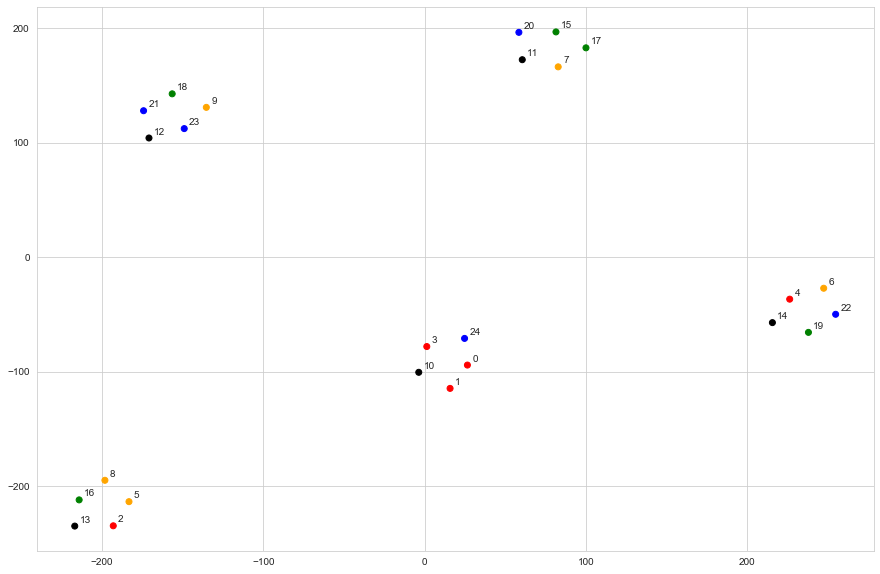

In [22]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(pure_X_2d[:,0],pure_X_2d[:,1],c=colors)
for i, txt in enumerate(pure_model_nodes):
    ax.annotate(txt, 
                (pure_X_2d[:,0][i],pure_X_2d[:,1][i]),
               xytext=(pure_X_2d[:,0][i]+3,pure_X_2d[:,1][i]+3) # moving the numbers aside
               )

In [23]:
G_pure.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14), (13, 14), (15, 16), (15, 17), (15, 18), (15, 19), (16, 17), (16, 18), (16, 19), (17, 18), (17, 19), (18, 19), (20, 21), (20, 22), (20, 23), (20, 24), (21, 22), (21, 23), (21, 24), (22, 23), (22, 24), (23, 24)])

In [24]:
for node, _ in pure_model.most_similar('2'):
    print(node)

3
0
1
4
21
24
23
19
15
12


In [25]:
pure_model.most_similar('2')

[('3', 0.9997850656509399),
 ('0', 0.9996746182441711),
 ('1', 0.9990482926368713),
 ('4', 0.9984728097915649),
 ('21', 0.35533320903778076),
 ('24', 0.3535193204879761),
 ('23', 0.3512972593307495),
 ('19', 0.3495604991912842),
 ('15', 0.3467426598072052),
 ('12', 0.34663262963294983)]

In [26]:
for node, _ in pure_model.most_similar('5'):
    print(node)

7
9
8
6
24
23
19
16
15
21


In [27]:
for i in range(0,24):
    if pure_clusters_2d[i]==1:
        print(pure_model_nodes[i], pure_clusters_2d[i])


3 1
0 1
1 1
24 1
10 1


It seems that word2vec gives good results for most_similar() function, e.t. find the node from the same group. Though, visialization doesn't prove it. Clusters contain nodes from different groups. 

## 1.2 Clusterization with the help of the most_similar() function

In [28]:
keys = list(range(0,24,5)) # the first node of each group

embedding_clusters = []
word_clusters = []
for word in keys:
    print('word ',word)
    embeddings = []
    words = []
    embeddings.append(pure_model[str(word)]) # adding vector of the first(key) node
    words.append(str(word)) # adding vector of the first(key) node
    for similar_word, prob in pure_model.most_similar(str(word), topn=4): # или добавлять в зависимости от вероятности 
        words.append(similar_word)
        print(similar_word)
        embeddings.append(pure_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

word  0
2
3
4
1
word  5
7
9
8
6
word  10
14
13
11
12
word  15
19
16
17
18
word  20
22
23
24
21


__TODO:__
- add a function to find the gap between probabilities of the 'similar_word's -> gap_prob

In [29]:
keys = list(range(1,25,5)) # the first node of each group
gap_prob = 0.8

embedding_clusters = []
word_clusters = []
for word in keys:
    print('word ',word)
    embeddings = []
    words = []
    embeddings.append(pure_model[str(word)]) # adding vector of the first(key) node
    words.append(str(word)) # adding vector of the first(key) node
    for similar_word, prob in pure_model.most_similar(str(word)): # или добавлять в зависимости от вероятности 
        if prob > gap_prob:
            words.append(similar_word)
            print(similar_word)
            embeddings.append(pure_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

word  1
3
4
2
0
word  6
5
9
8
7
word  11
12
14
13
10
word  16
15
19
17
18
word  21
24
20
23
22


__TODO:__
1. find the way how not to add more nodes to the cluster than it should be:

        e.g. don't add nodes to the cluster if it was already added into other cluster

In [30]:
# # top 10 similar words adding
# keys = list(range(0,24,5)) # the first node of each group

# embedding_clusters = []
# word_clusters = []
# for word in keys:
#     print('word ',word)
#     embeddings = []
#     words = []
#     embeddings.append(pure_model[str(word)]) # adding vector of the first(key) node
#     words.append(str(word)) # adding vector of the first(key) node
#     for similar_word, prob in pure_model.most_similar(str(word), topn=10): # или добавлять в зависимости от вероятности 
#         words.append(similar_word)
#         print(similar_word)
#         embeddings.append(pure_model[similar_word])
#     embedding_clusters.append(embeddings)
#     word_clusters.append(words)

In [31]:
word_clusters

[['1', '3', '4', '2', '0'],
 ['6', '5', '9', '8', '7'],
 ['11', '12', '14', '13', '10'],
 ['16', '15', '19', '17', '18'],
 ['21', '24', '20', '23', '22']]

In [32]:
len(embedding_clusters)

5

In [33]:
len(embedding_clusters[0])

5

In [37]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
print(n, m, k)
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, random_state=seed)
embeddings_en_2d = np.array(
    tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

5 5 128


In [38]:
embeddings_en_2d

array([[[-330.01224  ,  142.44797  ],
        [-301.7878   ,  141.67665  ],
        [-287.22308  ,  115.89711  ],
        [-314.92325  ,  108.12852  ],
        [-342.15005  ,  115.605156 ]],

       [[  32.14068  , -331.7798   ],
        [  69.17095  , -337.30884  ],
        [  68.26331  , -365.65085  ],
        [  54.673016 , -313.0414   ],
        [  39.6066   , -359.51196  ]],

       [[ -96.01121  ,  -84.11259  ],
        [ -70.6021   , -125.71407  ],
        [-118.78813  , -102.47476  ],
        [ -70.69025  ,  -96.50861  ],
        [ -98.739624 , -122.37636  ]],

       [[ 274.81012  ,   27.776115 ],
        [ 255.16498  ,   48.004734 ],
        [ 251.363    ,   10.288258 ],
        [ 226.37878  ,   23.811756 ],
        [ 227.22047  ,   53.06877  ]],

       [[   3.743666 ,  208.3336   ],
        [  32.265156 ,  214.5334   ],
        [  19.139174 ,  162.36725  ],
        [  34.084473 ,  186.14752  ],
        [  -3.6042676,  180.74904  ]]], dtype=float32)

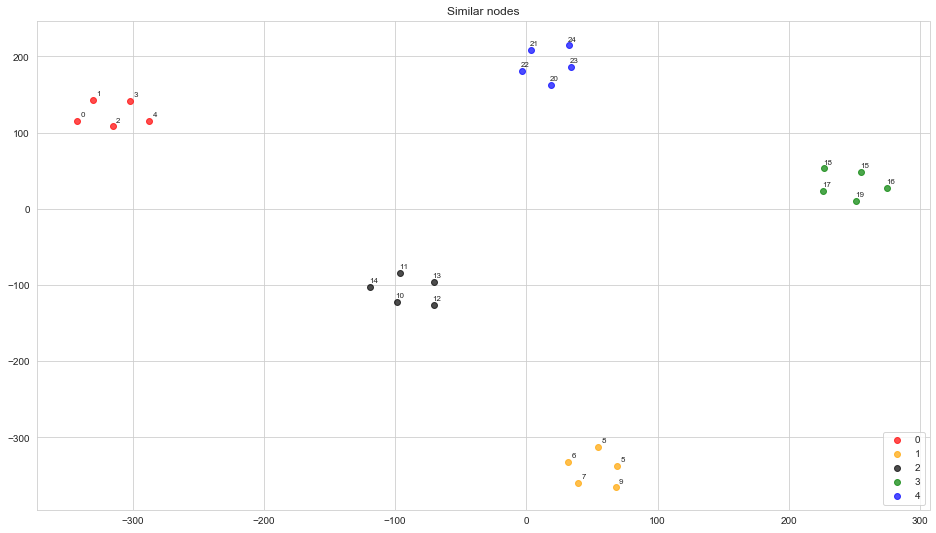

In [39]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
#     colors = colors_dic[]
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=colors_dic[label], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=1, xy=(x[i]+2, y[i]+2), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar nodes', labels_list, embeddings_en_2d, word_clusters, 0.7)


# 2. Adding the group's nodes into the graph and comparing with the results

In [ ]:
G_with_grnode = nx.Graph()

In [ ]:
for i, row in pure_edges.iterrows():
    G_with_grnode.add_edge(row['from'],row['to'], weight=1)
for i, row in labels.iterrows():
    G_with_grnode.add_edge(row['node'],row['label+'], weight=1)

In [ ]:
G_with_grnode.size()

In [ ]:
G_with_grnode.edges()

In [ ]:
pos = nx.spring_layout(G_with_grnode)
nx.draw(G_with_grnode,pos=pos, with_labels=True)

In [ ]:
dimensions = 10
walk_length = 1
num_walks = 20
p = 1.0
q = 1.0
workers = 4

window = 10
min_count = 1
seed = 0

In [ ]:
n2v = Node2Vec(G_with_grnode,
               dimensions = dimensions,
               walk_length = walk_length,
               num_walks = num_walks, 
               p = p,
               q = q,
               workers = workers
              )

In [ ]:
model_with_grnode = n2v.fit(window=window, seed=seed, min_count=min_count)

In [ ]:
X_with_grnode = model_with_grnode.wv.vectors

In [ ]:
X_with_grnode

In [ ]:
tsne_with_grnode = TSNE(n_components=2, random_state=seed, perplexity=15)
X_with_grnode_2d = tsne_with_grnode.fit_transform(X_with_grnode)

In [ ]:
X_with_grnode_2d[:5]

In [ ]:
model_with_grnode.wv.vocab

In [ ]:
for node,_ in model_with_grnode.most_similar('100'):
    print(node)

In [ ]:
for node,_ in model_with_grnode.most_similar('101'):
    print(node)

In [ ]:
for node,_ in model_with_grnode.most_similar('0'):
    print(node)

So far, adding of the group nodes didn't help. 

# 3. Ading edges between group nodes

In [ ]:
G_linked_gr = nx.Graph()

In [ ]:
for i, row in pure_edges.iterrows():
    G_linked_gr.add_edge(row['from'],row['to'], weight=1)
for i, row in labels.iterrows():
    G_linked_gr.add_edge(row['node'],row['label+'], weight=1)

In [ ]:
groups_edges = [(100, 101), (101, 102),(102,103),(103,104),(104,100)]
G_linked_gr.add_edges_from(groups_edges)

In [ ]:
G_linked_gr.edges()

In [ ]:
G_linked_gr.nodes()

In [ ]:
pos = nx.spring_layout(G_linked_gr)
nx.draw(G_linked_gr,pos=pos, with_labels=True)

In [ ]:
dimensions = 10
walk_length = 1
num_walks = 2
p = 1.0
q = 1.0
workers = 4

window = 2
min_count = 1
seed = 0

In [ ]:
n2v_linked_gr = Node2Vec(G_linked_gr,
               dimensions = dimensions,
               walk_length = walk_length,
               num_walks = num_walks, 
               p = p,
               q = q,
               workers = workers
              )

In [ ]:
model_linked_gr = n2v_linked_gr.fit(window=window, seed=seed, min_count=min_count) 

In [ ]:
model_linked_gr_nodes = list(model_linked_gr.wv.vocab)
print(model_linked_gr_nodes)

In [ ]:
for i in range(0,len(model_linked_gr.wv.vectors)):
    print(i)
    print(model_linked_gr.wv.vectors[i])

In [ ]:
vector_17 = (model_linked_gr.wv.vocab['17'])
dir(vector_17)

In [ ]:
X_linked_gr = model_linked_gr.wv.vectors
X_linked_gr[:10]

In [ ]:
tsne_linked_gr = TSNE(n_components=2, random_state=seed, perplexity=5)
X_linked_gr_2d = tsne_linked_gr.fit_transform(X_linked_gr)

In [ ]:
X_linked_gr_2d[:10]

In [ ]:
for node,_ in model_linked_gr.most_similar('0'):
    print(node)

In [ ]:
for node,_ in model_linked_gr.most_similar('100'):
    print(node)

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

ax.scatter(X_linked_gr_2d[:,0],X_linked_gr_2d[:,1])


In [ ]:
linked_gr_sorted_labels = []

for i in model_linked_gr_nodes:
    if int(i) < 100:
        linked_gr_sorted_labels.append(labels.loc[int(i)]['label'])

linked_gr_sorted_labels

In [ ]:
linked_gr_f1 = metrics.f1_score(linked_gr_sorted_labels,linked_gr_clusters, average='micro')
linked_gr_f1_2d = metrics.f1_score(linked_gr_sorted_labels,linked_gr_clusters_2d, average='micro')

print(linked_gr_f1, linked_gr_f1_2d)